In [1]:
pip install "numpy<2" --force-reinstall


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   --- ------------------------------------ 1.3/15.5 MB 6.7 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/15.5 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/15.5 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 5.2/15.5 MB 6.4 MB/s eta 0:00:02
   ---------------- ----------------------- 6.6/15.5 MB 6.4 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/15.5 MB 6.6 MB/s eta 0:00:02
   ------------------------ --------------- 9.4/15.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------- ----------- 11.0/15.5 MB 6.7 MB/s eta 0:00:01
   -------------------------------- ------- 12.6/15.5 MB 6.8 MB/s eta 0:00:01
   ------------------------------------ --- 14.2/15.5 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.5 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 6.6 MB/s eta 0:00:00
 

In [2]:
pip install -U jupyter ipykernel

  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-24.11.1-py3-none-any.whl.metadata (2.2 kB)
Using cached jupyter-1.1.1-py2.py3-none-any.whl (2.7 kB)
Using cached webcolors-24.11.1-py3-none-any.whl (14 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.29.5
    Uninstalling ipykernel-6.29.5:
      Successfully uninstalled ipykernel-6.29.5
  Attempting uninstall: jupyter
    Found existing installation: jupyter 1.0.0
    Uninstalling jupyter-1.0.0:
      Successfully uninstalled jupyter-1.0.0
Note: you may need to restart the kernel to use updated package

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.5.1 requires ipython!=8.17.1,<9.0.0,>=8.13.0; python_version > "3.8", but you have ipython 9.0.2 which is incompatible.
spyder-kernels 2.5.0 requires ipykernel<7,>=6.23.2; python_version >= "3.8", but you have ipykernel 7.0.1 which is incompatible.
spyder-kernels 2.5.0 requires ipython!=8.17.1,<9,>=8.13.0; python_version > "3.8", but you have ipython 9.0.2 which is incompatible.


In [3]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [4]:

# Chargement du dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]




In [5]:
df.shape

(150, 5)

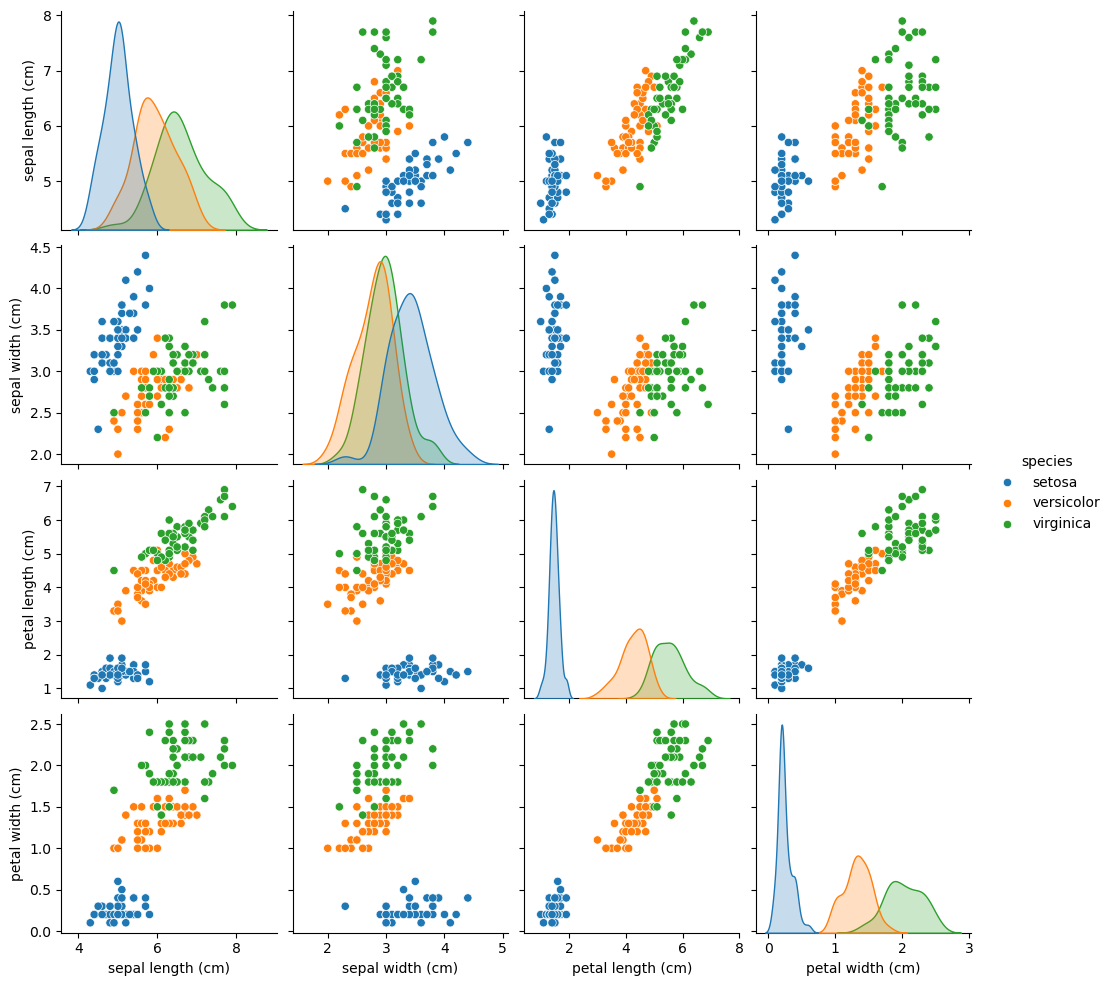

In [6]:

# Visualisation
sns.pairplot(df, hue='species')
plt.show()



In [7]:
# Aperçu
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Prédiction
y_pred = knn.predict(X_test)

In [11]:
# Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc:.2f}")

Accuracy : 1.00


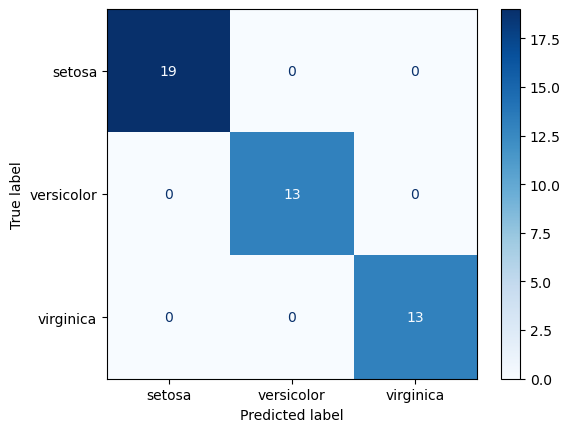

In [12]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()


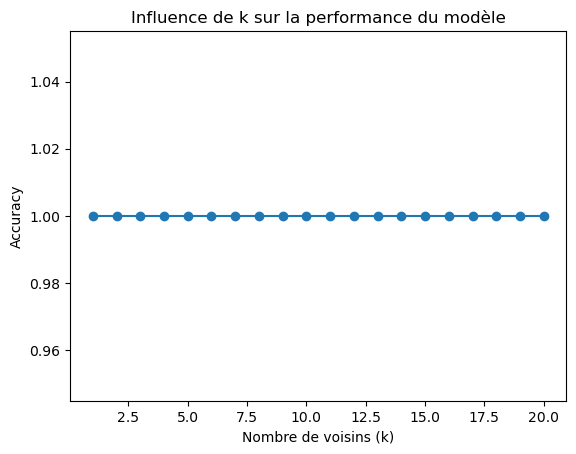

In [13]:
# Analyse de la performance en fonction de k
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.plot(range(1, 21), scores, marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy')
plt.title('Influence de k sur la performance du modèle')
plt.show()

### Decision Boundaries of KNN on the Iris Dataset

In [14]:
# ==============================================
# Decision Boundaries of KNN on Iris Dataset
# ==============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use first two features for 2D visualization (sepal length, sepal width)
y = iris.target
target_names = iris.target_names



In [15]:
# 2. Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [16]:
# 3. Create a KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
knn.fit(X_std, y)


KNeighborsClassifier()

In [17]:
# 4. Create a mesh grid for decision boundary visualization
h = .02  # step size in the mesh
x_min, x_max = X_std[:, 0].min() - 1, X_std[:, 0].max() + 1
y_min, y_max = X_std[:, 1].min() - 1, X_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [18]:
# 5. Predict class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

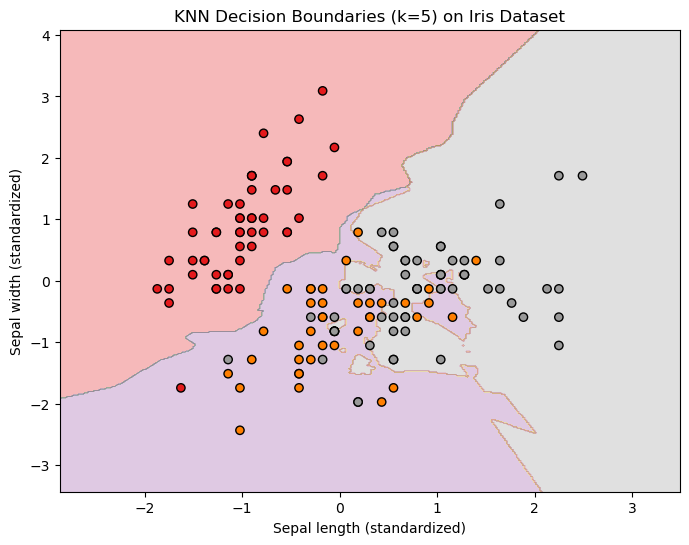

In [19]:
# 6. Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title(f'KNN Decision Boundaries (k={k}) on Iris Dataset')
plt.savefig('KNN Decision Boundaries on Iris Dataset.png', dpi=300)
plt.show()

### Reduce overfitting

1. **KNN is extremely sensitive to overfitting**.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


2. Cross Validation to choose the best k
    * Use a  GridSearch with cross-validation :

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-val accuracy:", grid.best_score_)


Best parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best cross-val accuracy: 0.9428571428571428


**Remark** : Effect automatic selection of the optimal 𝑘 value and the most stable distance metric.